# FastConsensus Demo

This notebook demonstrates the usage of the FastConsensus algorithm and compares its results with individual community detection algorithms.

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import igraph as ig
import matplotlib.pyplot as plt
from fastconsensus.algorithms import get_algorithm
from fastconsensus.core import fast_consensus_clustering



In [10]:
# Load the Karate Club graph
g = ig.Graph.Famous("Zachary")
print(f"Loaded Karate Club graph with {g.vcount()} nodes and {g.ecount()} edges")

Loaded Karate Club graph with 34 nodes and 78 edges


In [11]:
def plot_communities(g, partition, title):
    color_list = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan']
    node_colors = [color_list[c % len(color_list)] for c in partition.values()]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ig.plot(
        g,
        target=ax,
        vertex_color=node_colors,
        vertex_size=20,
        edge_width=0.5,
        layout=g.layout_fruchterman_reingold()
    )
    plt.title(title)
    plt.axis('off')
    plt.show()

## Test individual algorithms

Louvain algorithm detected 4 communities


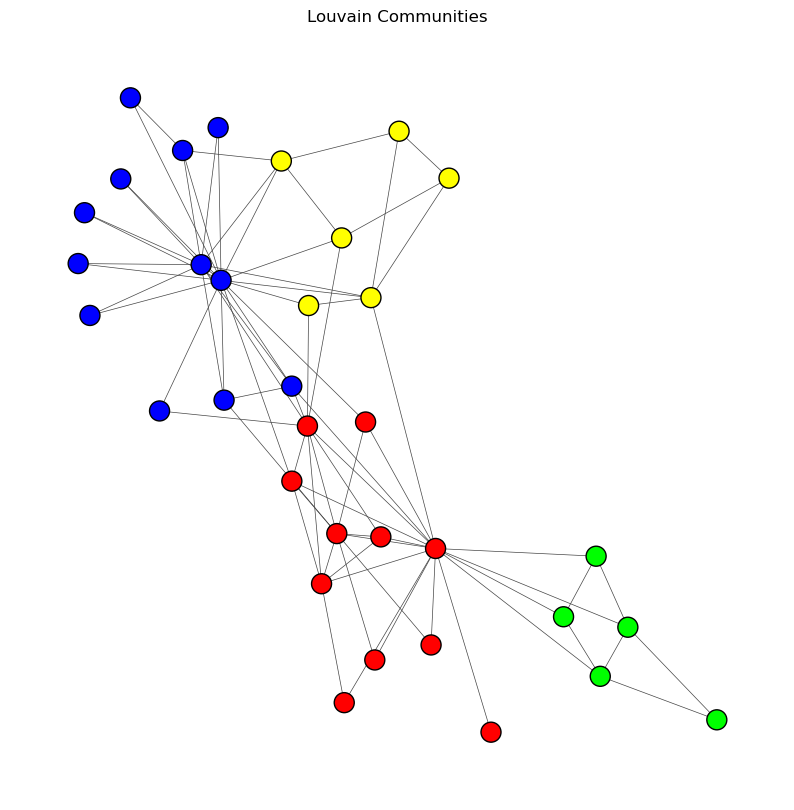

Label_propagation algorithm detected 2 communities


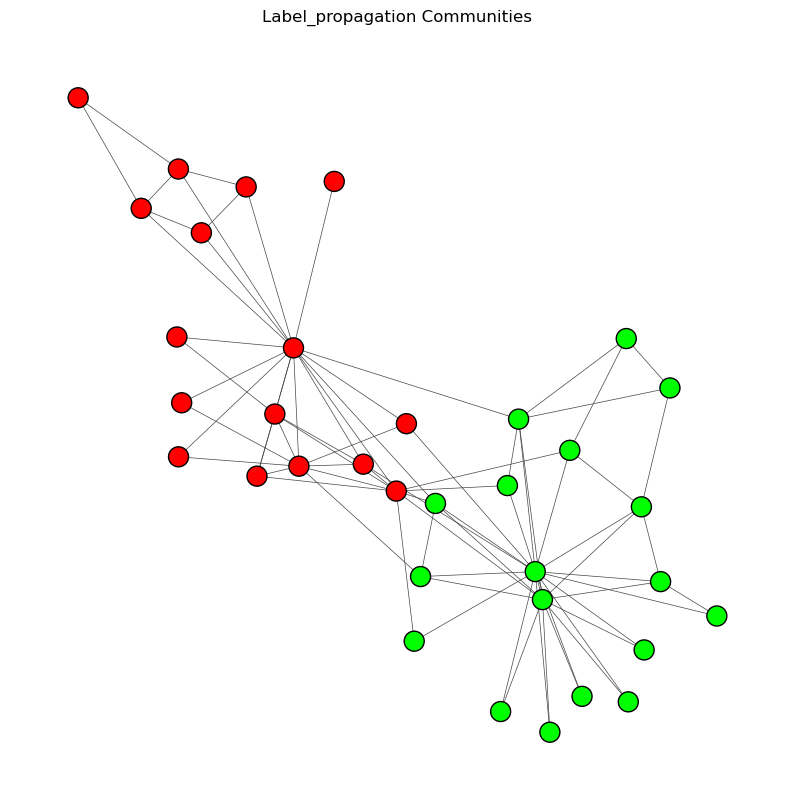

In [12]:
algorithms = ['louvain', 'label_propagation']

for alg_name in algorithms:
    alg = get_algorithm(alg_name)
    partition = alg.detect_communities(g)
    print(f"{alg_name.capitalize()} algorithm detected {len(set(partition.values()))} communities")
    plot_communities(g, partition, f"{alg_name.capitalize()} Communities")

## Test FastConsensus algorithm

FastConsensus detected 3 communities


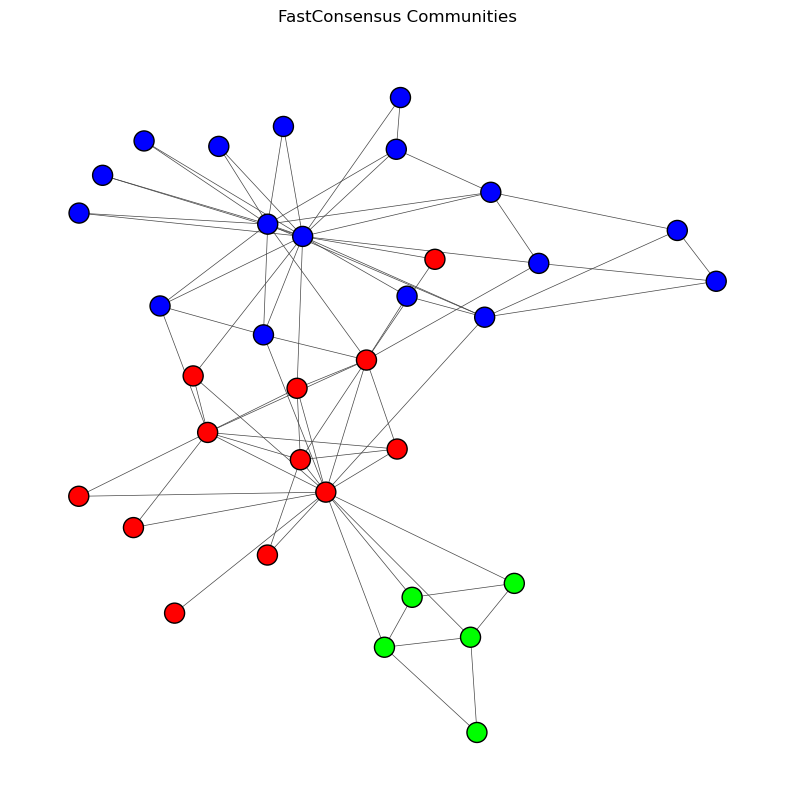

In [21]:
# Run FastConsensus with default parameters
fast_consensus_partition = fast_consensus_clustering(g, n_partitions=100, threshold=0.2, algorithm='louvain')
print(f"FastConsensus detected {len(set(fast_consensus_partition.values()))} communities")
plot_communities(g, fast_consensus_partition, "FastConsensus Communities")

## Compare results

In [18]:
from fastconsensus.utils import calculate_modularity, compare_partitions

# Calculate modularity for each partition
print("Modularity scores:")
for alg_name in algorithms + ['FastConsensus']:
    if alg_name == 'FastConsensus':
        partition = fast_consensus_partition
    else:
        partition = get_algorithm(alg_name).detect_communities(g)
    modularity = calculate_modularity(g, partition)
    print(f"{alg_name}: {modularity:.4f}")

# Compare partitions
print("\nNormalized Mutual Information (NMI) between partitions:")
for i, alg1 in enumerate(algorithms + ['FastConsensus']):
    for alg2 in (algorithms + ['FastConsensus'])[i+1:]:
        if alg1 == 'FastConsensus':
            partition1 = fast_consensus_partition
        else:
            partition1 = get_algorithm(alg1).detect_communities(g)
        
        if alg2 == 'FastConsensus':
            partition2 = fast_consensus_partition
        else:
            partition2 = get_algorithm(alg2).detect_communities(g)
        
        nmi = compare_partitions(partition1, partition2)
        print(f"{alg1} vs {alg2}: {nmi:.4f}")

Modularity scores:
louvain: 0.4198
label_propagation: 0.4020
FastConsensus: 0.3432

Normalized Mutual Information (NMI) between partitions:


AttributeError: 'NoneType' object has no attribute 'vcount'